# Исследование успешности компьютерных игр

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from scipy import stats as st

Откроем и изучим данные:

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().agg(['sum','mean']).transpose()

,sum,mean
Name,2.0,0.000120
Platform,0.0,0.000000
Year_of_Release,269.0,0.016093
Genre,2.0,0.000120
NA_sales,0.0,0.000000
EU_sales,0.0,0.000000
JP_sales,0.0,0.000000
Other_sales,0.0,0.000000
Critic_Score,8578.0,0.513192
User_Score,6701.0,0.400897


In [6]:
for row in df: 
      print(df[row].value_counts())

Need for Speed: Most Wanted                       12
Madden NFL 07                                      9
Ratatouille                                        9
FIFA 14                                            9
LEGO Marvel Super Heroes                           9
                                                  ..
Picross 2                                          1
Tamagotchi no KiraKira Omisecchi                   1
The Urbz: Sims in the City (all regions sales)     1
Major Minor's Majestic March                       1
Theatrhythm Final Fantasy: Curtain Call            1
Name: Name, Length: 11559, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2


In [7]:
df[df['Name'] == 'Need for Speed: Most Wanted']  

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод

У нас таблица с 11 столбцами и 16715 строками  
В заголовка есть заглавные  буквы, необходимо будет изменить  
Оценки и рейтинг есть у менее чем половины игр, нужно подумать, возможно ли их чем то заполнить    
Год релиза необходимо будет привести к формату datetime  
Genre, Platform, Rating можно поменять на категориальный тип  
User_Score - численный показатель, изменим на float  
Год релиза также заполнен не у всех игр
Одна игра отдельно представлена для каждой платформы, что логично, так как игры и пользоваельский опыт могут сильно отличаться, что видно в разлии рейтингов.

## Предобработка данных

Переименуем столбцы, уберем заглавную букву:

In [9]:
df.columns = df.columns.str.lower()

Заполним часть пропусков в годе выпуска игры исходя из даты ее выхода на других платформах

In [10]:
df.query('name == "Inversion"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12146,Inversion,PS3,2012.0,Shooter,0.03,0.03,0.0,0.01,56.0,5.4,M
12678,Inversion,X360,2012.0,Shooter,0.03,0.02,0.0,0.01,53.0,6.5,M
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


In [11]:
df['year_of_release'] = df.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.min()))

In [12]:
df.query('name == "Inversion"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12146,Inversion,PS3,2012.0,Shooter,0.03,0.03,0.0,0.01,56.0,5.4,M
12678,Inversion,X360,2012.0,Shooter,0.03,0.02,0.0,0.01,53.0,6.5,M
16448,Inversion,PC,2012.0,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


Изменим типы данных в таблицах

In [13]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y')

это позволит удобно работать с датой в столбце

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заполним часть пропусков в в рейтинге игры исходя из ее рейтинга на других платформах

In [15]:
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))

Прежде чем сделать тоже самое с user_score, необходимо изменить у него тип данных, а для этого нужно избавиться от строк в колонке. tbd - "To Be Determined" судя по описанию соответствует NaN, еще не заполненные данные.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [17]:
df['user_score'] = df['user_score'].astype('float')

Теперь получится заменить часть пропусков

In [18]:
df['user_score'] = df.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))

In [19]:
df[df['name'] == 'Need for Speed: Most Wanted']  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005-01-01,Racing,2.03,1.79,0.08,0.47,82.0,9.100000,T
523,Need for Speed: Most Wanted,PS3,2012-01-01,Racing,0.71,1.46,0.06,0.58,77.5,8.377778,NaN
1190,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.500000,T
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.500000,T
1998,Need for Speed: Most Wanted,XB,2005-01-01,Racing,0.53,0.46,0.00,0.05,83.0,8.800000,T
2048,Need for Speed: Most Wanted,PSV,2012-01-01,Racing,0.33,0.45,0.01,0.22,77.5,8.377778,NaN
3581,Need for Speed: Most Wanted,GC,2005-01-01,Racing,0.43,0.11,0.00,0.02,80.0,9.100000,T
5972,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.500000,T
6273,Need for Speed: Most Wanted,WiiU,2013-01-01,Racing,0.13,0.12,0.00,0.02,77.5,8.377778,NaN
6410,Need for Speed: Most Wanted,DS,2005-01-01,Racing,0.24,0.01,0.00,0.02,45.0,6.100000,E


In [20]:
df.isnull().agg(['sum','mean']).transpose()

,sum,mean
name,2.0,0.000120
platform,0.0,0.000000
year_of_release,148.0,0.008854
genre,2.0,0.000120
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000
critic_score,7617.0,0.455698
user_score,8026.0,0.480168


Мы заполнили лишь небольшую часть пропусков.
 
Если оценки нет, значит сообщество не присвоило ее по разным причинам: слишком мало отзывов, для этой игры на этой платформе не проводился замер оценок, присвоение рейтинга, на момент выхода игры не собирали оценки и не присваивали рейтинг ...  

Адекватно заполнить остальные пропуски, без большого снижения точности анализа, не вижу возможности
При анализе влияния оценок и рейтинга на продажи игр будем исходить только из тех оценок что есть. Не будем делать замены, это может негативно повлиять на достоверность результата.  
При этом мы понимаем, что возможные крупные продажи выпадут из анализа.


Лишь в незначительной доли строк отсутвует название игры и год выпуска, удалим этим строки.

In [21]:
df.dropna(subset=['year_of_release', 'name'], inplace=True)

In [22]:
df.isnull().agg(['sum','mean']).transpose()

,sum,mean
name,0.0,0.000000
platform,0.0,0.000000
year_of_release,0.0,0.000000
genre,0.0,0.000000
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000
critic_score,7532.0,0.454639
user_score,7928.0,0.478542


In [23]:
df['genre'] = df['genre'].astype('category')

In [24]:
df['rating'] = df['rating'].astype('category')

Такое изменение позволит снизить использование памяти, так как в каждом из этих столбцов лишь небольшое количество значений многократно повторяются

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null datetime64[ns]
genre              16567 non-null category
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       9035 non-null float64
user_score         8639 non-null float64
rating             9868 non-null category
dtypes: category(2), datetime64[ns](1), float64(6), object(2)
memory usage: 1.3+ MB


Добавим столбец с общими продажами:

In [26]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

Мы убрали заглавную букву из названий столбцов

Заполнили часть пропусков в годе выпуска игры исходя из даты ее выхода на других платформах

Добавили столбец с общими продажами


## Анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

In [27]:
def plot(column, f, y='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = df.groupby(column)[y]
    if f == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif f == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')

Text(0, 0.5, 'Количество, шт')

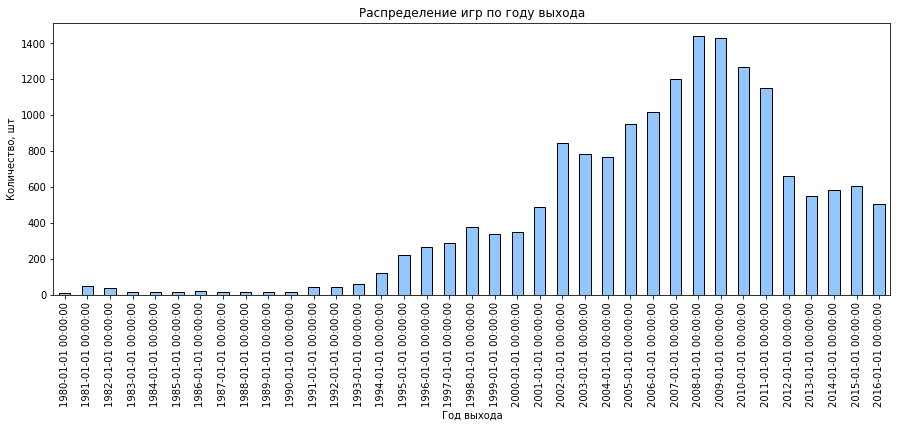

In [28]:
plot('year_of_release', 'count')
plt.title('Распределение игр по году выхода')
plt.xlabel('Год выхода')
plt.ylabel('Количество, шт')

На этом графике можно выделить 4 явных периода:
- до 1994 года игр было сравнительно мало, что видимо связано с доступностью платформ. 
- после 1994 колчество выпущенных игр увеличилось в десятки раз, могу предположить, что это связано с широким распространением персональных компъютеров
- в 2002 году выход на новый уровень 2 х кратный рост с продолжением такой динамики, возможно связано с популярностью игровых платформ  типа PS 
- резкое снижение выпуска игр в 2012 году, видимо из-за переориентации клиентов и разработчиков на мобильный гейминг, статистика по которомы не включена в наши данные.

Для нас имеет значение только последний период.

Посмотрим, как менялись продажи по платформам.  

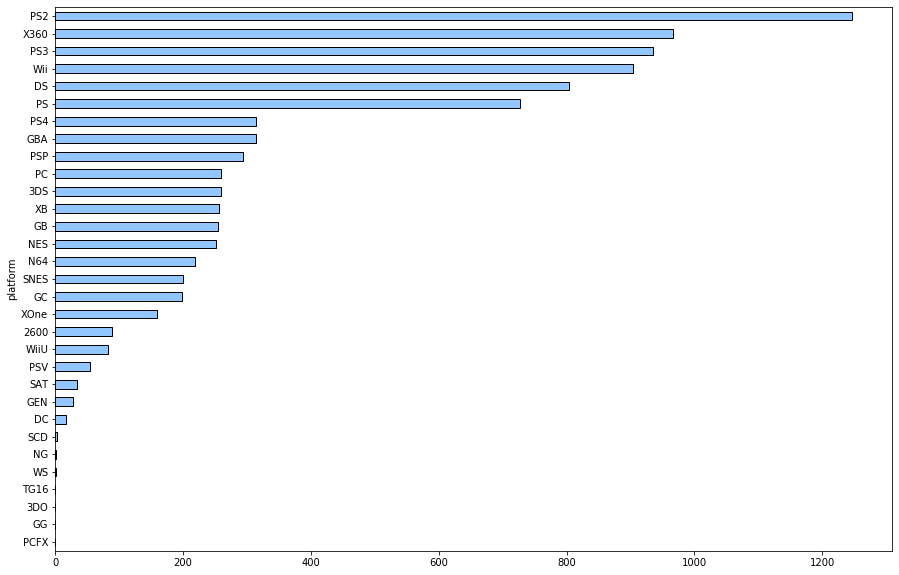

In [29]:
plot('platform', 'sum', 'sales')

Логично видеть в числе самых популярых платформы прошлых поколений, того времени, пока ещё не было мобильного гейминга:
1. PS2
2. XBOX 360
3. PS3
4. Wii
5. DS
6. PS  

Так как данные у нас только до 2016 г. предполагалаю, что отставание PS4 от младших моделей уже сильно сократилось

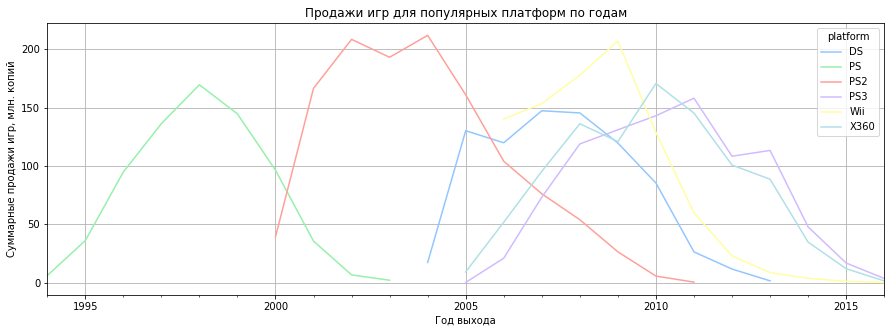

In [30]:
(
df
.query('platform == ["PS2", "PS3", "X360", "Wii", "DS", "PS"] and year_of_release >= "1994-01-01"')    
.pivot_table(index = ['year_of_release'], columns = 'platform',
values = 'sales', aggfunc = 'sum')
.plot(grid=True, figsize=(15, 5))
)
plt.title('Продажи игр для популярных платформ по годам')
plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи игр, млн. копий');

Игры PS2 активно продавались с 2000 по 2011 - 12 лет
XBOX360 - c 2005 по 2015  - 11 лет
PS3 - c 2006 по 2015 - 10 лет
Wii - c 2006 по 2012 - 7 лет
DS - c 2004 по 2010 - 7 лет
PS - c 1994 по 2002 - 9 лет

Можем сделать вывод, что средний срок жизни игровой платформы 10 лет.
При этом видно, что в первый год игры приносят очень небольшой доход, также как в последние
Основной доход приходит за 5- 8 лет

Как мы увидели ранее, глобальный тренд изменился в 2012 году. Исключим из анализа данные устаревших трендов:

In [31]:
fg = df.query('year_of_release >= "2012-01-01"')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

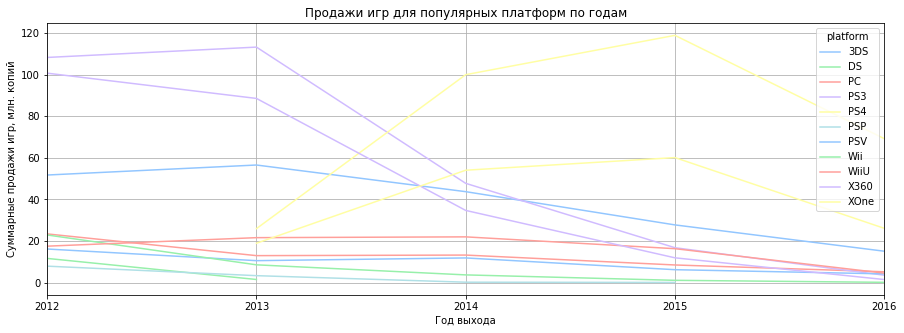

In [32]:
(
fg 
.pivot_table(index = ['year_of_release'], columns = 'platform',
values = 'sales', aggfunc = 'sum')
.plot(grid=True, figsize=(15, 5))
)
plt.title('Продажи игр для популярных платформ по годам')
plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи игр, млн. копий');

На этом графике видно, что продажи на всех платформах падают. Чтобы было удобнее изучать, выделим лидеров продаж и отследим только их динамику

In [33]:
fg.query('year_of_release == "2016-01-01"').groupby('platform')['sales'].sum().sort_values(ascending = False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: sales, dtype: float64

In [34]:
top = fg.query('year_of_release == "2016-01-01"').groupby('platform')['sales'].sum().sort_values(ascending = False).index
top

Index(['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii'], dtype='object', name='platform')

PS4, XBOX One и Nintendo 3DS лидируют по продажам в 2016 году, отследим их динамику.

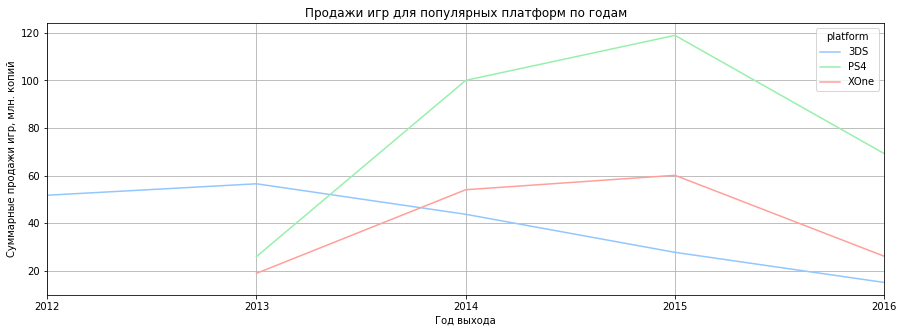

In [35]:
(
fg
.query('platform == ["PS4", "XOne", "3DS"]')    
.pivot_table(index = ['year_of_release'], columns = 'platform',
values = 'sales', aggfunc = 'sum')
.plot(grid=True, figsize=(15, 5))
)
plt.title('Продажи игр для популярных платформ по годам')
plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи игр, млн. копий');

Продажи PS4, XBOX One увеличились в 2014 г. через год после их выхода, росто продолжился в 2015, но уже в 2016 году началось падение продаж.
Продажи на всех платформах падают
Можно предположить следующее:
- срок жизни платформы снижается
- люди меньше играют в игры (маловероятно)
- усиливается конкуренция с мобильным геймингом (более вероятно)
- снижается количество инди разработок - ведь у нас данные только по количеству продаж, не по сумме, возможно геймеры отдают все деньги мейджорам за дорогие долгоиграющие проекты, при этом возможно общая выручка растет
- люди пропочитают больше смотреть стримы игр, а не играть самостоятельно
- люди играют на новых облачных платформах (вроде нет)
...

Вариантов может быть множество. Но очевидно, что в ближайшее время деньги будут приность 2 основные платформы PS4 и XBOX One.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

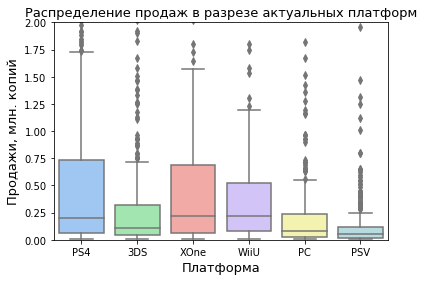

In [36]:
ax = (
sns.boxplot
    (x ="platform"
     , y = "sales"
     , data = fg.query('platform == ["PS4", "XOne", "3DS", "PC", "WiiU", "PSV"]'))
    
    
)    
plt.ylim(0,2)
plt.title("Распределение продаж в разрезе актуальных платформ", fontsize = 13)
plt.ylabel("Продажи, млн. копий", fontsize=13)
plt.xlabel("Платформа", fontsize=13)
plt.show();

Медианные значения продаж копий игр различаются не так сильно как средние. По каждому графику видно значительное влияние выбросов.
Игр делается много, при этом незначительное количество успешных игр продается гигантскими тиражами, отсюда такие жирные усы и смещение медианы.
Если сравнить двух главных конкурентов PS4 и XBOX One, видно, что основное отличие как раз и заключается в жирных хвостах, остальные параметры очень близки.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [37]:
xone = fg.query('platform == "XOne"')

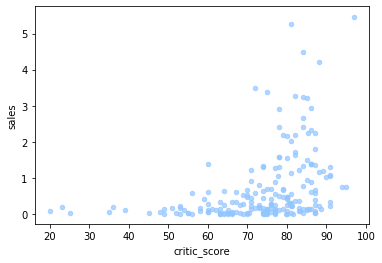

In [38]:
ax = xone.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.7)


In [39]:
xone['critic_score'].corr(xone['sales'])

0.3739897235124057

Видна прямая существенная зависимость между средней оценкой критиков и объемом продаж.
Думаю многие пользователи ориентируются на эти оцени при принятии решения о покупке, особенно сразу после выхода игры, когда идет наибольший объем продаж, так как только критики успели игру оценить(политика издателей, делиться игрой игрой на ранних этапах для разогрева интереса)

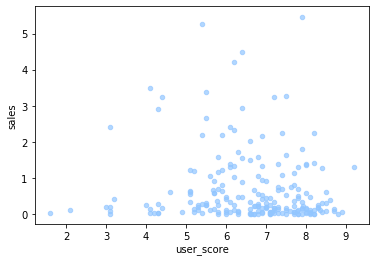

In [40]:
ax = xone.plot(x='user_score', y='sales', kind='scatter', alpha = 0.7)

In [41]:
xone['user_score'].corr(xone['sales'])

-0.09402749243006257

В данном случае зависимости объема продаж от оценки пользователей нет, что очень странно для меня.

Основной объем продаж игр приходится на первые месяцы после выпуска, в этот момент еще не успевает сформироваться пользовательский рейтиг и покупатели формируют свои ожидания на основе других параметров: студия, дизайнер, история, жанр, отзывы критиков, бюджет и еще много факторов
Часто уже поиграв немного клиент разочаровывается, и это отражается в его оценке.

Можно предположить, что подобное положение вещей и на других платформах

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

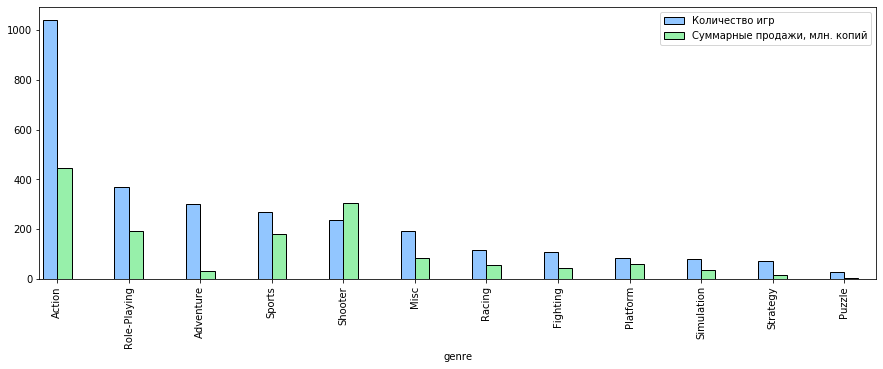

In [46]:
ax = plt.gca()

pivot = fg.groupby('genre').agg({'name': 'count', 'sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество игр', 'Суммарные продажи, млн. копий']);

Больше всего игр делают в жанре action, с большим отставанием за ним идут: ролевые, приключенческие, спортивные игры и шутеры.  
При это по количеству проданных копий шутеры лишь немногим уступают аграм в жанре action
Самые высокие продажи игр в жанре action и sport
Сложно по нашим данным судить о прибыльности жанров. Возможно мы как магазин имеем большую маржу с продажи пазлов, при этом продаем в целом их мало, нет смысла рекламировать.
Шутеры хорошо и быстро продаются, но возможно маржа магазина минимальна.
Если предположить, что маржа для разных игр и жанров одинаковая, то прибыль магазина будет зависеть исключительно от объема продаж и затрат на рекламу.
Прорекламировать несколько тайтлов шутеров для магазина будет верным выбором



In [45]:
fg.groupby('genre')['sales'].mean().sort_values(ascending = False)

genre
Shooter         1.285865
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.441865
Simulation      0.439000
Action          0.428828
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: sales, dtype: float64

## Составьте портрет пользователя каждого региона

Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?


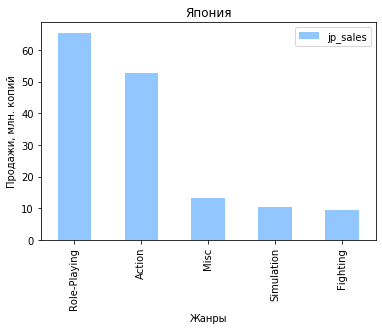

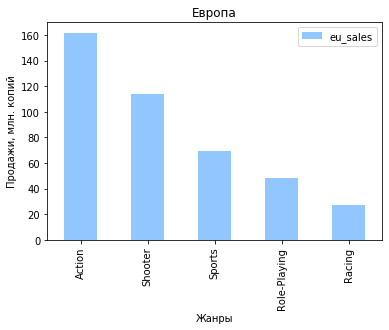

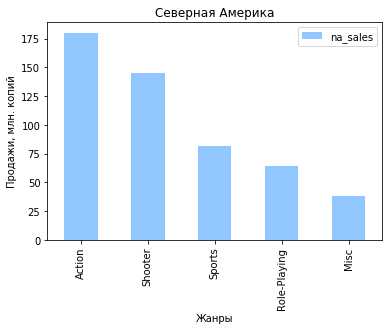

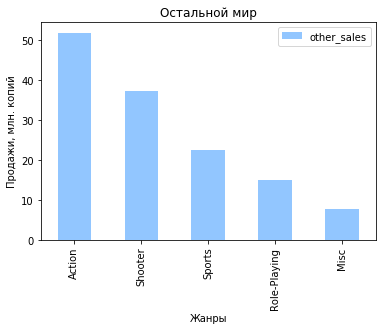

In [47]:
fg.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Япония")
plt.xlabel("Жанры")
plt.ylabel("Продажи, млн. копий")
plt.show
fg.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Европа")
plt.xlabel("Жанры")
plt.ylabel("Продажи, млн. копий")
fg.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Северная Америка")
plt.xlabel("Жанры")
plt.ylabel("Продажи, млн. копий")

fg.groupby(by='genre').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Остальной мир")
plt.xlabel("Жанры")
plt.ylabel("Продажи, млн. копий");

Во всём мире самым популярным жанром являетя action, за ним идут шутеры, спортивные и ролевые игры.

При это Япония стоит особняком - на первом месте ролевые игры, шутеров в топе нет совсем, зато есть файтинги и симуляторы.
Это можно объяснить культурными различиями

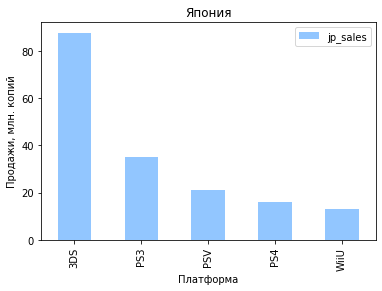

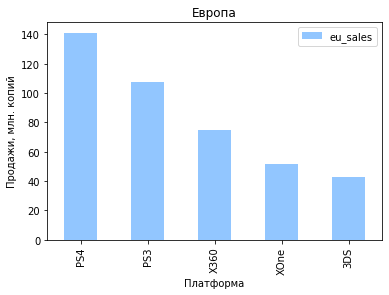

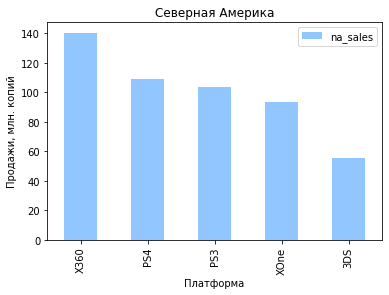

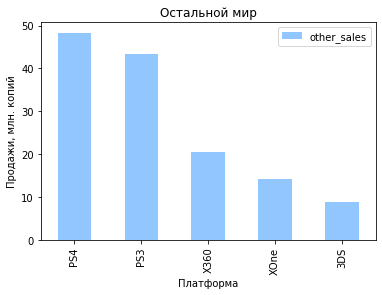

In [48]:
fg.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Япония")
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. копий")
plt.show
fg.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Европа")
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. копий")

fg.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Северная Америка")
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. копий")

fg.groupby(by='platform').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Остальной мир")
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. копий");

В европе и мире большая часть продаж игр приходится на PS4, PS3, XBOX 360, XBOX One, и 3DS.  
Видно, старые поколения играют всё еще большую роль.
В северной Америке, где влияние Microsoft сильнее, XBOX 360 на первом месте, в остальном порядок не меняется.

В Японии же, родине Sony и Nintendo, на 1 первом месте игры для 3DS, дальше 3 места у приставок Sony, и снова Wii Nintendo.

Японцы сильны на внутреннем рынке

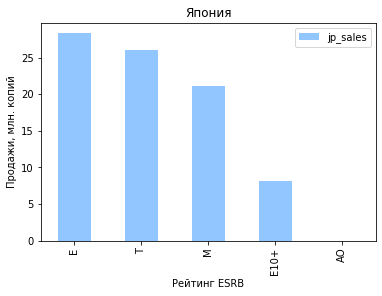

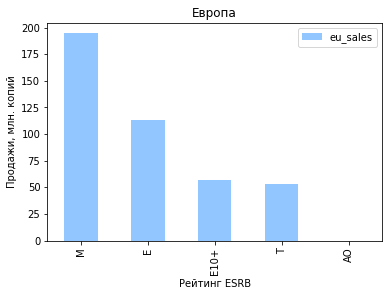

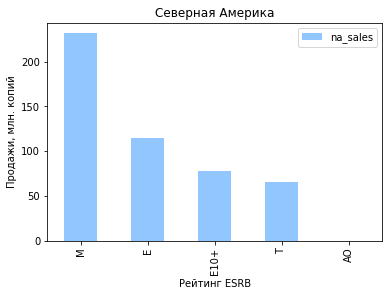

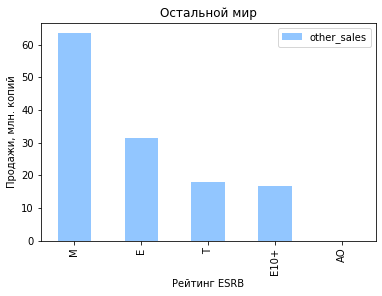

In [49]:
fg.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Япония")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. копий")
plt.show
fg.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Европа")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. копий")

fg.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Северная Америка")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. копий")

fg.groupby(by='rating').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar')


plt.title("Остальной мир")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. копий");

Во всем мире кроме Японии в лидерах игры с рейтингом М (от 17 лет),  
на втором месте логично продажи игр с рейтингом Е (для всех)  
3 е место делят игры с рейтингом Е10+ (от 10 лет) и  Т (от 13 лет)
Игр с откровенным взрослым рейтингом АО(18+) очень мало

В Японии же опять отличие, на первых местах игры с рейтинго Е и Т, что логично вытекает из пристрастия к дргим жанрам

## Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action и Sports разные.  
Задайте самостоятельно пороговое значение alpha.

### Гипотеза 1

Проверим гипотезе о равенстве средних оценок на 2 х платформах:  
Сформулируем нулевую гипотезу Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [50]:
alpha = 0.01

In [51]:
pc = fg.query('platform == "PC" and user_score > 0')['user_score'] 

In [52]:
xone = xone.query('user_score > 0')['user_score'] 

In [59]:
results = st.ttest_ind(pc, xone, equal_var = False)
results.pvalue

0.2947414488931663

In [55]:
pc.describe()

count    215.000000
mean       6.448078
std        1.664963
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [56]:
xone.describe()

count    206.000000
mean       6.604086
std        1.378118
min        1.600000
25%        5.800000
50%        6.800000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

In [57]:
alpha / results.pvalue

0.033928041127410824

Мы не можем отвергнуть нулевую гипотезу, pvalue занчительно выше нашего уровня значимости и говорит скорее о случайном отклонении выборочных средних.

Средняя оценка пользователей ПК не отличается от средней оценки пользователей XBOX One

### Гипотеза 2

Проверим гипотезе о различии средних оценок игр разных жанров:  
Сформулируем нулевую гипотезу Н0: средние пользовательские рейтинги игр в жанрах Action и Sports одинаковые  
Альтернативная гипотеза Н1: средние пользовательские рейтинги игр в жанрах Action отличаются от таковых  в спортивных играх

In [62]:
alpha = 0.01

In [60]:
action = fg.query('genre == "Action" and user_score > 0')['user_score'] 

In [61]:
sports = fg.query('genre == "Sports" and user_score > 0')['user_score'] 

In [63]:
results = st.ttest_ind(action, sports, equal_var = False)
results.pvalue

1.308704171145194e-25

In [64]:
sports.describe()

count    221.000000
mean       5.417590
std        1.693369
min        0.200000
25%        4.300000
50%        5.700000
75%        6.700000
max        8.800000
Name: user_score, dtype: float64

In [67]:
action.describe()

count    610.000000
mean       6.862616
std        1.374293
min        1.600000
25%        6.225000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [68]:
alpha / results.pvalue

7.641146273148504e+22

Мы отвергаем нулевую гипотезу, pvalue занчительно ниже нашего уровня значимости и говорит о том, что разница в средних не случайна  

Средние пользовательские рейтинги игр в жанрах Action отличаются от таковых  в спортивных играх

## Вывод

На входе мы получили таблицу с 11 столбцами и 16715 строками

Мы убрали заглавную букву из названий столбцов
Оценки и рейтинг есть у менее чем половины игр
Часть пропусков мы заполнили исходя из данных этой же игры на других платформах
Год релиза привели к формату datetime
Genre, Platform, Rating поменяли на категориальный тип
User_Score - численный показатель, изменилт на float
Добавили столбец с общими продажами

По количеству выпущенных игр выделили 4 периода:

до 1994 года игр было сравнительно мало, что видимо связано с доступностью платформ.
после 1994 колчество выпущенных игр увеличилось в десятки раз, могу предположить, что это связано с широким распространением персональных компъютеров
в 2002 году выход на новый уровень 2 х кратный рост с продолжением такой динамики, возможно связано с популярностью игровых платформ типа PS
резкое снижение выпуска игр в 2012 году, видимо из-за переориентации клиентов и разработчиков на мобильный гейминг, статистика по которомы не включена в наши данные.
Для нас имеет значение только последний период.

В числе самых популярых платформы прошлых поколений, до мобильного гейминга:
PS2
XBOX 360
PS3
Wii
DS
PS

Средний срок жизни игровой платформы 10 лет. 

Глобальный тренд изменился в 2012 году, далее изучаем только свежие данные

В ближайшее время деньги будут приность 2 основные платформы PS4 и XBOX One.

Игр делается много, при этом незначительное количество успешных игр продается гигантскими тиражами.

Оценки критиков влияют на продажи, оценки пользователей нет

Самым популярным жанром являетя action, за ним идут шутеры, спортивные и ролевые игры.

В Японии на первом месте ролевые игры

Большая часть продаж игр приходится на PS4, PS3, XBOX 360, XBOX One, и 3DS.
Японцы сильны на внутреннем рынке, Microsoft нет в топе.

Во всем мире кроме Японии в лидерах игры с рейтингом М (от 17 лет),
на втором месте логично продажи игр с рейтингом Е (для всех)
3 е место делят игры с рейтингом Е10+ (от 10 лет) и Т (от 13 лет) Игр с откровенным взрослым рейтингом АО(18+) очень мало

Средняя оценка пользователей ПК не отличается от средней оценки пользователей XBOX One
Средние пользовательские рейтинги игр в жанрах Action отличаются от таковых  в спортивных играх

Успешность игры в первую очередь определяют жанр и платформа, также важны оценки критиков.
Делаем рекламу для шутера на PS4!